In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
journal_entries = pd.read_excel("Vinatics 2019 Journal Entries.xlsx")
journal_entries.head()

,JE Number,GL Code,Period,Effective Date,Entry Date,Source,Source Group,Functional Amount,Preparer
0,210000003,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-302887.20000,Merrie Beaver
1,210000003,60000113,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,250320.00000,Merrie Beaver
2,210000003,20001102,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,52567.20000,Merrie Beaver
3,210000006,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-11708.75376,Merrie Beaver
4,210000006,60000112,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,9676.65600,Merrie Beaver


In [2]:
journal_entries_copy = journal_entries.copy()
journal_entries_copy = journal_entries_copy[['GL Code','Source','Entry Date','Functional Amount']]
journal_entries_copy['Month'] = journal_entries_copy['Entry Date'].dt.month_name()
journal_entries_copy.head()

,GL Code,Source,Entry Date,Functional Amount,Month
0,60000001,Invoice,2019-01-21,-302887.20000,January
1,60000113,Invoice,2019-01-21,250320.00000,January
2,20001102,Invoice,2019-01-21,52567.20000,January
3,60000001,Invoice,2019-01-21,-11708.75376,January
4,60000112,Invoice,2019-01-21,9676.65600,January


In [3]:
chart_of_account = pd.read_excel("Vinatics Chart of Accounts.xlsx")
chart_of_account.head()

,Account Number,Account Type,Class,Sub class,Account Name
0,20000050,Assets,Receivables,Trade receivables,Customer invoices
1,20000051,Assets,Receivables,Trade receivables,Credit notes
2,20000000,Assets,Receivables,Trade receivables,Receivables 1
3,20000021,Assets,Receivables,Trade receivables,Receivables 2
4,20000002,Assets,Receivables,Trade receivables,Receivables 3


In [4]:
journal_entries_copy = journal_entries_copy.merge(chart_of_account, how = 'outer', left_on='GL Code', right_on='Account Number').drop(['GL Code','Account Number','Entry Date','Account Name','Sub class'], axis = 1)
journal_entries_copy.head()

,Source,Functional Amount,Month,Account Type,Class
0,Invoice,-302887.20000,January,Liabilities,Payables
1,Invoice,-11708.75376,January,Liabilities,Payables
2,Invoice,-3758.66208,January,Liabilities,Payables
3,Invoice,-18907.95696,January,Liabilities,Payables
4,Invoice,-17307.84000,January,Liabilities,Payables


In [5]:
revenue = journal_entries_copy[journal_entries_copy['Account Type'] == 'Revenue']
expenses = journal_entries_copy[journal_entries_copy['Account Type'] == 'Expenses']

In [6]:
revenue_chart = revenue.copy()
revenue_chart = revenue_chart[revenue_chart['Class'] == 'Revenue from contract with customers']
revenue_chart = revenue_chart.drop('Source', axis=1)
revenue_chart['Functional Amount'] *= -1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

revenue_chart['Month'] = pd.Categorical(revenue_chart['Month'], categories=months, ordered=True)
revenue_chart = revenue_chart.groupby(by = ['Month']).sum()
revenue_chart.rename(columns = {'Functional Amount':'Revenue'}, inplace=True)
revenue_chart.head()

,Revenue
Month,
January,1.673393e+08
February,1.598645e+08
March,1.286180e+08
April,1.296631e+08
May,1.421999e+08


In [7]:
revenue_chart_2 = revenue_chart.copy()
revenue_chart_2['Revenue'] = revenue_chart_2['Revenue']/1000000
revenue_chart_2

,Revenue
Month,
January,167.339284
February,159.864492
March,128.617999
April,129.663150
May,142.199897
June,149.251740
July,107.969612
August,110.586170
September,165.353012


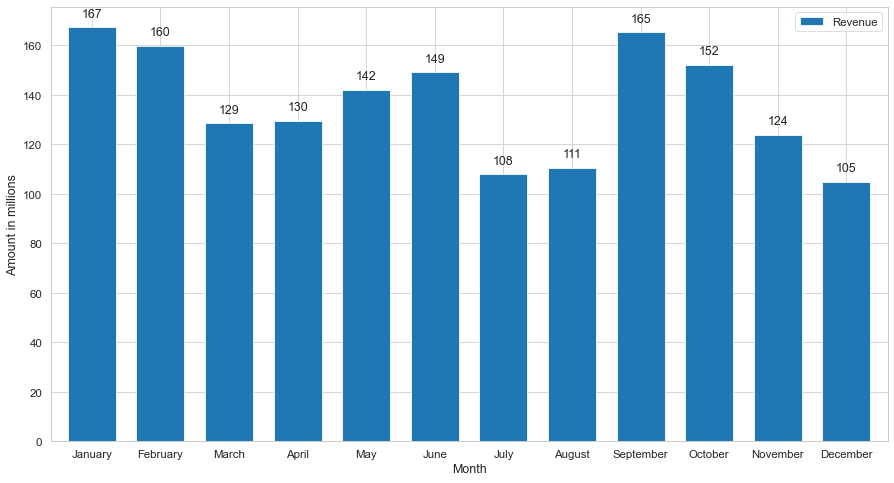

In [8]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = revenue_chart_2.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.7)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=0)

for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

In [9]:
expenses_chart = expenses.copy()
expenses_chart = expenses_chart[expenses_chart['Class'] == 'Cost of sales']
expenses_chart = expenses_chart.drop('Source', axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

expenses_chart['Month'] = pd.Categorical(expenses_chart['Month'], categories=months, ordered=True)

expenses_chart = expenses_chart.groupby(by = ['Month']).sum()
expenses_chart.rename(columns = {'Functional Amount':'Cost of Sales'}, inplace=True)
expenses_chart.head()

,Cost of Sales
Month,
January,1.419600e+08
February,2.522447e+07
March,4.043989e+07
April,6.385498e+07
May,6.021648e+07


In [10]:
expenses_chart_2 = expenses_chart.copy()
expenses_chart_2['Cost of Sales'] = expenses_chart_2['Cost of Sales']/1000000
expenses_chart_2

,Cost of Sales
Month,
January,141.959971
February,25.224471
March,40.439893
April,63.854983
May,60.216481
June,38.485597
July,87.020080
August,54.660612
September,46.716999


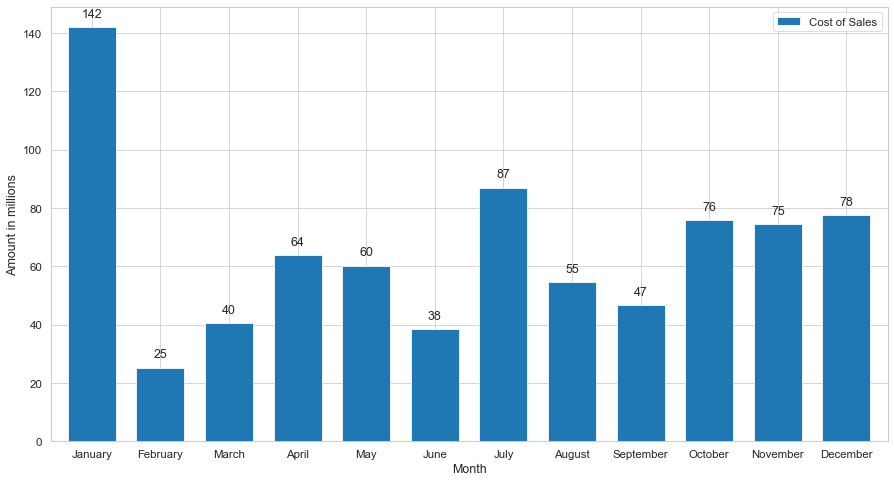

In [11]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = expenses_chart_2.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.7)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=0)

for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

In [12]:
gp = pd.merge(revenue_chart, expenses_chart, on='Month')
gp2 = gp.copy()
gp2['Gross Profit'] = gp2['Revenue'] - gp2['Cost of Sales']
# gp2['Gross Profit Margin'] = gp2['Gross Profit']/gp2['Revenue']*100
gp2

,Revenue,Cost of Sales,Gross Profit
Month,,,
January,1.673393e+08,1.419600e+08,2.537931e+07
February,1.598645e+08,2.522447e+07,1.346400e+08
March,1.286180e+08,4.043989e+07,8.817811e+07
April,1.296631e+08,6.385498e+07,6.580817e+07
May,1.421999e+08,6.021648e+07,8.198342e+07
June,1.492517e+08,3.848560e+07,1.107661e+08
July,1.079696e+08,8.702008e+07,2.094953e+07
August,1.105862e+08,5.466061e+07,5.592556e+07
September,1.653530e+08,4.671700e+07,1.186360e+08


In [13]:
gp3 = gp2.copy()
gp3['Revenue'] = gp3['Revenue']/1000000
gp3['Cost of Sales'] = gp3['Cost of Sales']/1000000
gp3['Gross Profit'] = gp3['Gross Profit']/1000000
gp3

,Revenue,Cost of Sales,Gross Profit
Month,,,
January,167.339284,141.959971,25.379313
February,159.864492,25.224471,134.640021
March,128.617999,40.439893,88.178106
April,129.663150,63.854983,65.808167
May,142.199897,60.216481,81.983416
June,149.251740,38.485597,110.766143
July,107.969612,87.020080,20.949532
August,110.586170,54.660612,55.925558
September,165.353012,46.716999,118.636012


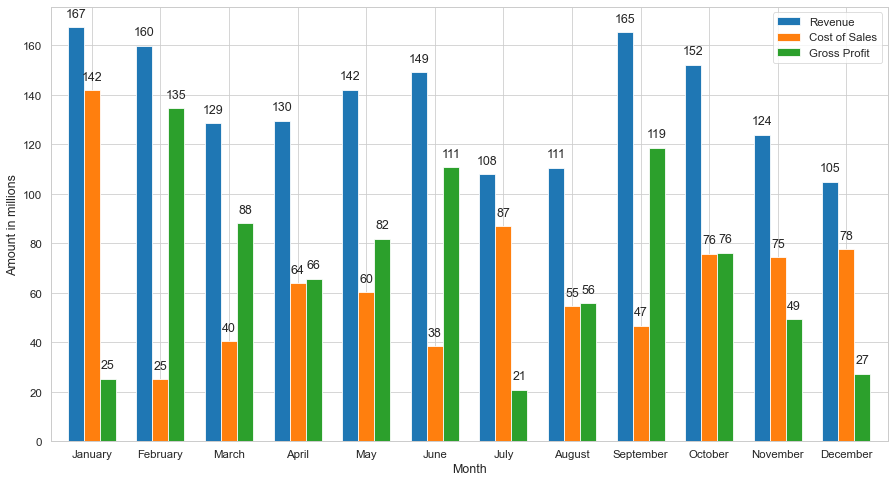

In [14]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = gp3.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.7)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=0)

for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')